# Modifies Multilayer Perceptron  with Batch Normalization Layers


## Initialize

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline
import pickle, numpy as np, pandas as pd
import matplotlib.pyplot as plt

root_notebook_folder = os.path.abspath('.')
data_folder = os.path.abspath('./local_data')

## Batch normalization layer example

$$\large x^`= \frac {x-E[x]} {\sqrt {Var(x) + \epsilon} } \cdot \gamma + \beta$$
- $\gamma$ and $\beta$ are learnable, with initial values $\gamma=1.0$ and $\beta=0.0$
- Distinct values of $\gamma$ and $\beta$ for every feature. 

In [2]:
import tensorflow as tf
batch_norm_layer = tf.keras.layers.BatchNormalization(axis=1,  center=True, scale=True)
input_data = np.random.randn(5, 6) # 5 batches, 6 features 
output_data = batch_norm_layer(input_data, training=True) 
input_data, output_data # note that the numbers do not differ significantly since the input is anyway normally distributed . 

(array([[ 1.19999789, -1.02603572, -1.73839541, -1.40825668,  1.77479304,
          0.09965515],
        [ 0.62686641,  0.19072233, -1.39849157, -0.26625251,  0.53509254,
          0.68592964],
        [ 0.89975372, -1.3338723 , -1.09806669, -1.09540368,  1.07353529,
         -0.06230289],
        [ 0.99474646, -1.65730211,  0.28406806,  0.585266  ,  0.45002263,
          2.06274118],
        [ 1.75731158,  0.56189216, -0.30642111,  0.50700312, -0.13623196,
         -0.88892346]]),
 <tf.Tensor: shape=(5, 6), dtype=float32, numpy=
 array([[ 0.27437568, -0.42775786, -1.1985147 , -1.3213024 ,  1.6048969 ,
         -0.28510046],
        [-1.2338656 ,  0.96718913, -0.7392024 ,  0.085329  , -0.3167627 ,
          0.31235546],
        [-0.5157409 , -0.7806759 , -0.3332379 , -0.93595463,  0.51787746,
         -0.45014736],
        [-0.26575994, -1.1514707 ,  1.5344421 ,  1.1341629 , -0.4486295 ,
          1.7154255 ],
        [ 1.7409914 ,  1.3927152 ,  0.7365135 ,  1.0377649 , -1.3573828 ,
  

Compute Mean and Std of every feature over the batch. Note that each of the features averages to 0 with std=1

In [3]:
np.mean(output_data,0), np.std(output_data,0)

(array([ 1.1920929e-07,  0.0000000e+00,  9.5367433e-08, -2.3841858e-08,
        -1.1920929e-07,  0.0000000e+00], dtype=float32),
 array([0.99653137, 0.99934244, 0.99908656, 0.99924105, 0.9987979 ,
        0.99948066], dtype=float32))

In [4]:
batch_norm_layer =  tf.keras.layers.BatchNormalization(axis=1,  center=True, scale=True)
input_data = np.random.normal(loc=100, scale=17, size=(10000, 10))
output_data = batch_norm_layer(input_data, training=True) 
input_data, output_data

(array([[124.47927343, 103.65406866,  91.7354816 , ...,  96.23079031,
          93.86699633,  75.79302052],
        [ 87.75131876,  83.36851695, 127.68237553, ..., 139.41255726,
          92.65946594, 100.76417291],
        [106.05298869,  86.1003108 ,  85.47255449, ...,  97.29455881,
         108.38012155, 110.42802307],
        ...,
        [ 93.62136982,  96.75672601, 124.54462061, ...,  87.1435889 ,
         100.91978524, 104.94311035],
        [ 89.76977712, 113.00075125,  85.69018407, ...,  77.3292526 ,
          96.62895228, 114.82825703],
        [101.98402986,  81.8017364 , 127.14103906, ..., 126.88418099,
          83.7448637 , 102.1394627 ]]),
 <tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
 array([[ 1.451221  ,  0.23536444, -0.4957881 , ..., -0.21035862,
         -0.33759022, -1.4288917 ],
        [-0.7081895 , -0.97801304,  1.6278372 , ...,  2.326326  ,
         -0.40861607,  0.04065466],
        [ 0.3678522 , -0.81461096, -0.8657813 , ..., -0.14786863,
          0.5

### Note that after normalization, every column is normalized
i.e. the values of every feature are normalized across all samples of the batch. 

In [5]:
#np.mean(output_data,axis=0)
np.mean(output_data[:,0])

7.806778e-07

In [6]:
np.std(output_data,axis=0)

array([0.99999934, 0.9999983 , 0.99999946, 0.9999986 , 0.99999684,
       0.99999845, 0.9999986 , 0.9999976 , 0.9999965 , 0.9999981 ],
      dtype=float32)

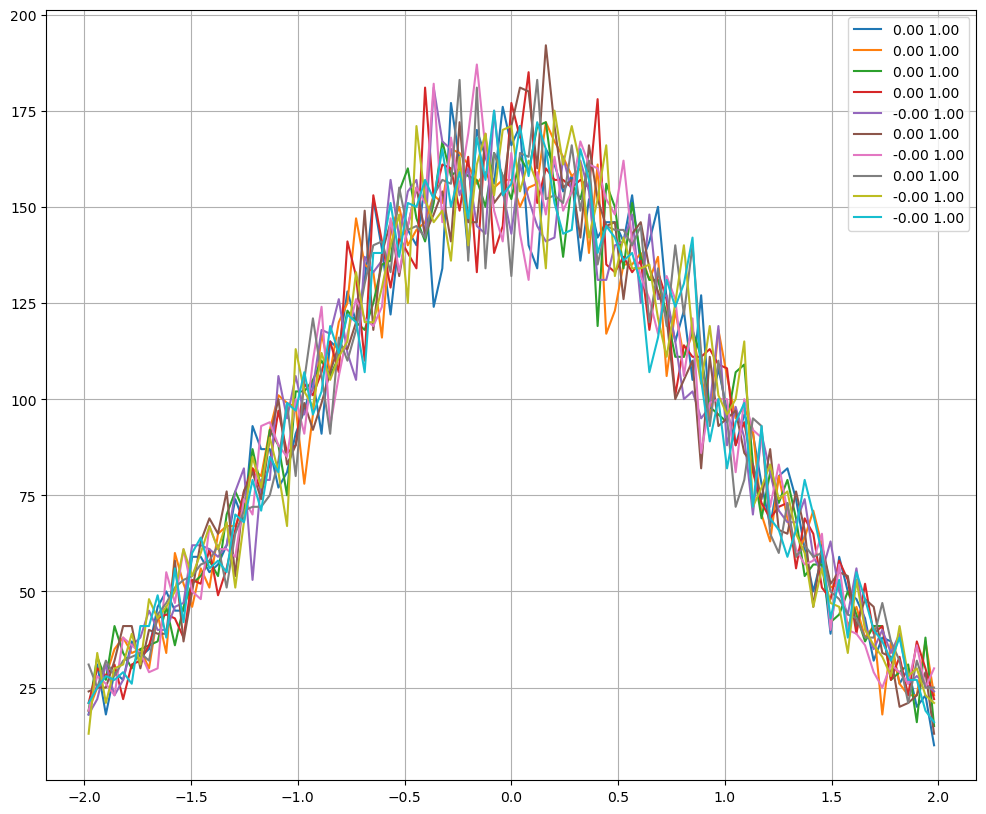

In [7]:
plt.figure(figsize=(12,10))
for i in range(output_data.shape[1]):
    y, x = np.histogram(output_data[:,i], np.linspace(-2,2,100));
    plt.plot(x[:-1]+np.diff(x)/2, y, label=f"{np.mean(output_data[:,i]):2.2f} {np.std(output_data[:,i]):2.2f}")
plt.grid(); plt.legend();

## Load MNIST

In [8]:
def load_mnist_csv(mnist_data_folder, data_type):
    import pandas as pd, os
    file_name = os.path.join(mnist_data_folder, f'mnist_{data_type}.csv.zip')
    df = pd.read_csv(file_name)
    labels = df.values[:,0].astype(np.int8)
    images = df.values[:,1:].astype(np.uint8).reshape( (-1, 28, 28))
    return labels, images

train_labels, train_images = load_mnist_csv( os.path.join(data_folder, 'MNIST')  ,  'train')
test_labels, test_images = load_mnist_csv( os.path.join(data_folder, 'MNIST')  ,  'test')

In [9]:
# normalize to mean=0 and std=1
train_images_norm = (train_images-train_images.mean()) /train_images .std() 
test_images_norm = (test_images-train_images.mean()) /train_images.std()

In [10]:
train_images_norm = train_images_norm.reshape(-1, 28*28) # 60,000 x 784
train_labels_onehot = pd.get_dummies(train_labels).values # 60,000 x 10

# split train set into train and validation
train_validation_split = np.random.rand(len(train_images_norm))<0.2 

valid_images_norm = train_images_norm[train_validation_split]     # ~ 12,000 x 784
valid_labels_onehot = train_labels_onehot[train_validation_split] # ~ 12,000 x 10

train_images_norm_fit = train_images_norm[~train_validation_split] # ~48,000 x 784
train_labels_onehot_fit = train_labels_onehot[~train_validation_split] # ~48,000 x 10

test_images_norm = test_images_norm.reshape(-1, 28*28) # 10,000 x 784
test_labels_onehot = pd.get_dummies(test_labels).values  # 10,000 x 10

## Define the Model

In [11]:
def generate_model(batch_normalization=True):
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, BatchNormalization

    model = Sequential()
    model.add(Dense(512, input_dim=28*28, activation='relu'))
    if batch_normalization: 
        model.add(BatchNormalization(axis=1))
    model.add(Dense(450, activation='relu'))
    if batch_normalization: 
        model.add(BatchNormalization(axis=1))
    model.add(Dense(450, activation='relu'))
    if batch_normalization: 
        model.add(BatchNormalization(axis=1))
    model.add(Dense(10, activation='sigmoid'))
    return model

## Train several models

In [12]:
models={}
for batch_normalization in [True, False]:
    model_file_name = os.path.join(data_folder, f"mnist_batchnorm_{1 if batch_normalization else 0}")
    if not os.path.isdir(model_file_name+'.model'):    
        model = generate_model(batch_normalization=batch_normalization)
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(train_images_norm_fit, train_labels_onehot_fit,  
                            validation_data=(valid_images_norm, valid_labels_onehot), 
                            epochs=50, batch_size=100, verbose=0)
        print(f"Trained model batch_normalization: {batch_normalization}")

        model.save(model_file_name + '.model')
        hist_df = pd.DataFrame(history.history) 
        hist_df.to_csv(model_file_name + '.history.csv')
    models[batch_normalization] = {
        'batch_normalization': batch_normalization,
        'history': pd.read_csv(model_file_name + '.history.csv', index_col=0),
        'model': tf.keras.models.load_model(model_file_name + '.model')        
    }    
    models[batch_normalization]['test_accuray'] = models[batch_normalization]['model'].evaluate(test_images_norm, test_labels_onehot, verbose=0)

## Compare models

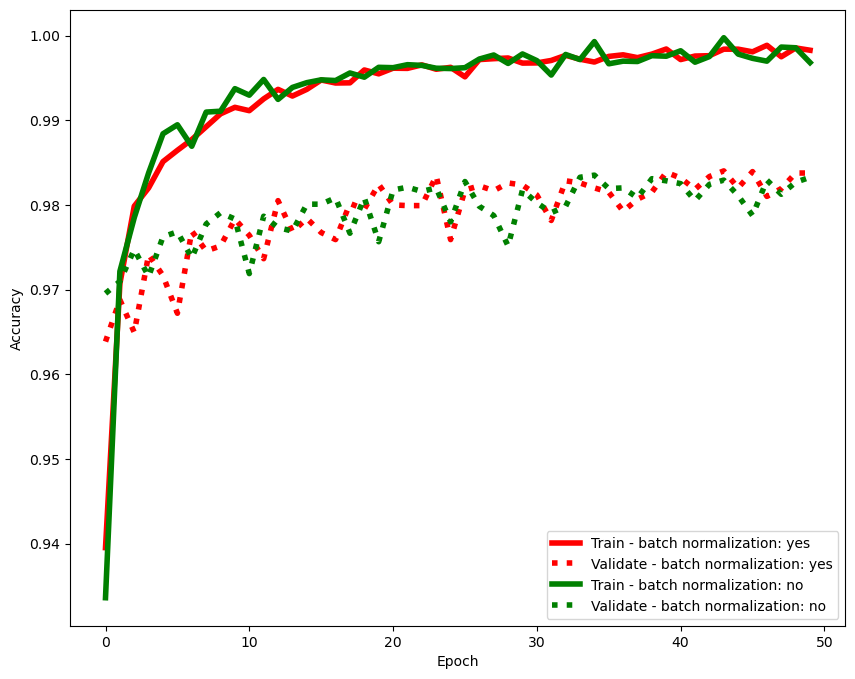

In [13]:
colors = ['r', 'g', 'b', 'c']
plt.figure(figsize=(10,8))
for i, batch_normalization in enumerate(models.keys()):
    history = models[batch_normalization]['history']
    plt.plot(history['accuracy'],'-' + colors[i], label=f"Train - batch normalization: {'yes' if batch_normalization else 'no'}" , linewidth=4)
    plt.plot(history['val_accuracy'],':' + colors[i], label=f"Validate - batch normalization: {'yes' if batch_normalization else 'no'}", linewidth=4 )
plt.legend(); plt.xlabel('Epoch'); plt.ylabel('Accuracy');    